In [6]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

gsw_overall_df =  pd.read_csv('gsw_overall_stats.csv')
gsw_5ft_df = pd.read_csv('gsw_5ft_stats.csv')
gsw_8ft_df = pd.read_csv('gsw_8ft_stats.csv')
gsw_shot_area_df = pd.read_csv('gsw_shot_area_stats.csv')
gsw_assisted_shot_df = pd.read_csv('gsw_assisted_shot_stats.csv')
gsw_shot_type_df = pd.read_csv('gsw_shot_type_stats.csv')
gsw_assisted_by_df = pd.read_csv('gsw_assisted_by_stats.csv')


In [13]:
print(gsw_5ft_df)

             GROUP_SET      GROUP_VALUE   FGM   FGA  FG_PCT  FG3M  FG3A  \
0  Shot Distance (5ft)  Less Than 5 ft.  1604  2440   0.657     0     0   
1  Shot Distance (5ft)          5-9 ft.   186   452   0.412     0     0   
2  Shot Distance (5ft)        10-14 ft.   271   634   0.427     0     0   
3  Shot Distance (5ft)        15-19 ft.   384   834   0.460     0     0   
4  Shot Distance (5ft)        20-24 ft.   485  1150   0.422   380   932   
5  Shot Distance (5ft)        25-29 ft.   585  1547   0.378   585  1547   
6  Shot Distance (5ft)        30-34 ft.    15    43   0.349    15    43   
7  Shot Distance (5ft)        35-39 ft.     0     2   0.000     0     2   
8  Shot Distance (5ft)          40+ ft.     1    37   0.027     1    37   

   FG3_PCT  EFG_PCT  BLKA       ...         EFG_PCT_RANK  BLKA_RANK  \
0    0.000    0.657   241       ...                    1          9   
1    0.000    0.412    31       ...                    7          8   
2    0.000    0.427    18       ... 

In [7]:
test_assisted_by_df = gsw_assisted_by_df[['PLAYER_NAME','FGM']]
print(test_assisted_by_df)

              PLAYER_NAME  FGM
0            Barnes, Matt   45
1              Clark, Ian   90
2          Curry, Stephen  524
3           Durant, Kevin  300
4         Green, Draymond  533
5         Iguodala, Andre  261
6       Livingston, Shaun  139
7           Looney, Kevon   29
8   McAdoo, James Michael   18
9          McCaw, Patrick   77
10          McGee, JaVale   17
11         Pachulia, Zaza  132
12         Thompson, Klay  160
13      Varejao, Anderson   10
14         Weber, Briante    5
15            West, David  151


The below code that is commented out are examples of changing specific fonts of the graph. Instead I found it was easier to just increase the scaling of the graph

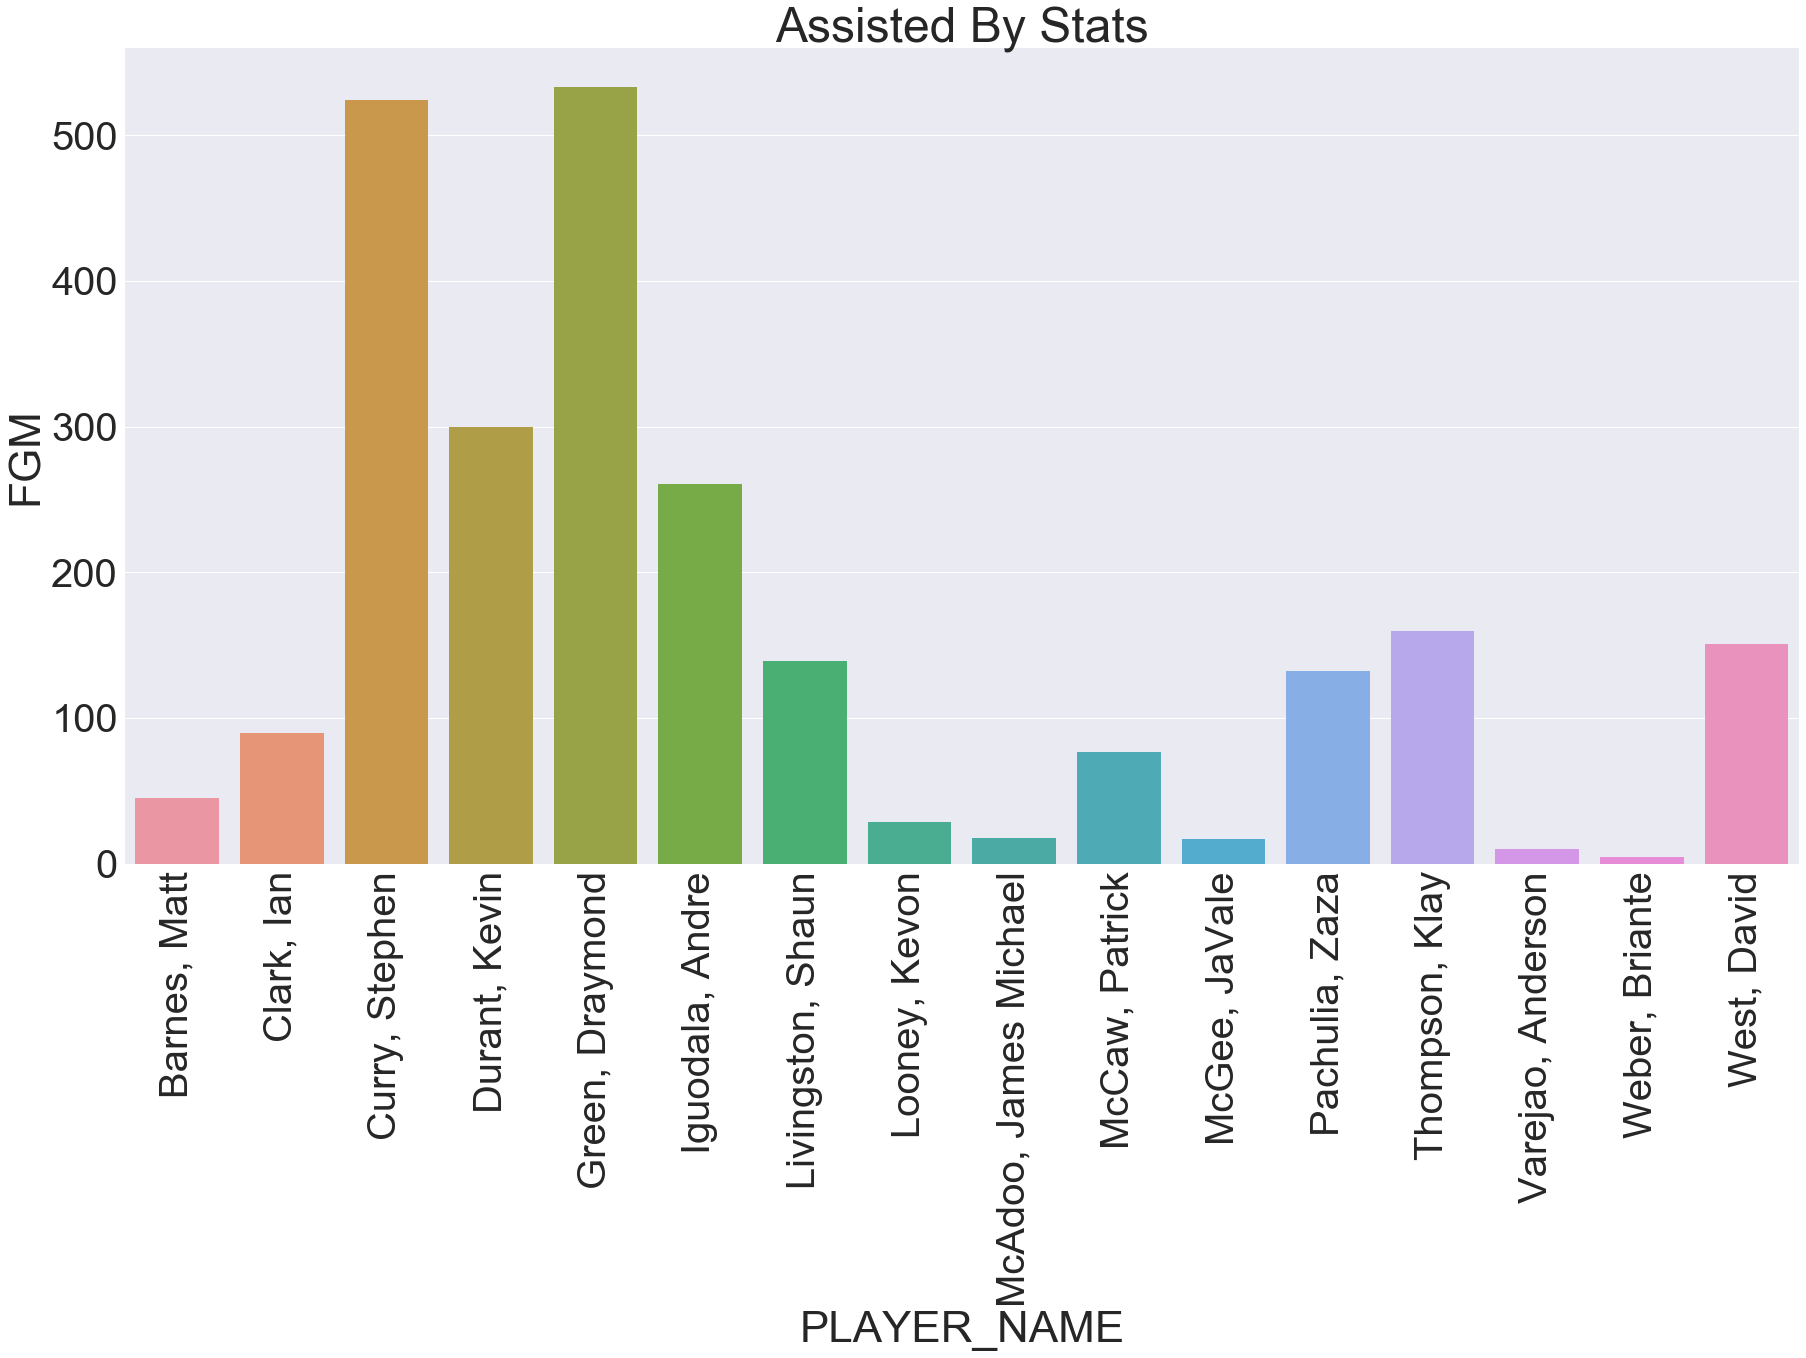

In [32]:
#plt.rcParams['figure.figsize']=(30,15)
#plt.rcParams["axes.labelsize"] = 50
sns.set(font_scale=4)
plt.xticks(rotation=90)
ax = sns.barplot(x='PLAYER_NAME',y='FGM',data=test_assisted_by_df)
ax.set_title('Assisted By Stats')
#ax.set_title('Assisted By Stats', fontsize = 50)